# Introduction
In Part II, we spent some time performing exploratory data analysis. EDA is good for examining distributions and intuitively grasping the nature of the data. 

Is that enough? Not yet, there's room for more.

As such, in this Part, we will:
1. Ask business-related questions
2. Interrogate the data we have to answer them

Asking business questions is different from EDA since we have to do a lot more digging, and answering domain-related questions.

Let's have fun and creatively work through our data to answer them.

Useful resource to read: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

### Step 1: Import libraries
We'll start off with importing libraries:
- pandas as pd
- matplotlib.pyplot as plt
- seaborn sns
- numpy as np

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
from numpy.random import randn

### Step 2: Read the DataFrame from Step I
We'll read the DataFrame that we got from step I.

In [2]:
# Step 2: Read your CSV as DataFrame
raw_df = pd.read_csv('merged_data.csv')
raw_df.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


### Step 3: Get the total numbers sold per category
<blockquote>How many did each category sell in total?</blockquote>
Your boss is curious about how many items were sold in each category. Previously when you did your univariate analysis on the 'category' column, you were looking for counts and not the total.

For this Step, you'll have to perform a groupby operation by category, followed by a sum operation.

Which category sold the most?

In [7]:
# Step 3: Get the total num_order per category
raw_df.groupby('category')['num_orders'].sum().reset_index(name='Total orders sold').sort_values(by='Total orders sold',ascending=False)

,category,Total orders sold
0,Beverages,40480525
8,Rice Bowl,20874063
10,Sandwich,17636782
9,Salad,10944336
7,Pizza,7383720
5,Other Snacks,4766293
13,Starters,4649122
3,Extras,3984979
11,Seafood,2715714
2,Desert,1940754


<details>
    <summary>Click once to see if what you got is the same as ours.</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/MostCategoryItemsSold.png"></div>
</details>

### Step 4: Get the total revenue made per category
<blockquote>Quantity might be good, but which category made the most money?</blockquote>
How does one answer that? 

First, you could multiply 'num_orders' with 'checkout price' to create a new column named 'total_revenue'.

After that, repeat Step 3 and perform a groupby operation. Does involving total revenue change the order as seen by your results in Step 3?

In [8]:
# Step 4a: Create total_revenue
df1 = raw_df.copy()
df1['total_revenue'] = df1['num_orders'] * df1['checkout_price']
df1.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_revenue
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,43873.09
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,12760.32
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,22145.18
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,31497.50


In [13]:
# Step 4b: Perform a groupby operation and sum revenue per category
df1.groupby('category', as_index=False)['total_revenue'].sum().sort_values(by='total_revenue',ascending=False)

,category,total_revenue
0,Beverages,7.347304e+09
8,Rice Bowl,5.881531e+09
10,Sandwich,4.663427e+09
7,Pizza,3.955956e+09
9,Salad,3.032256e+09
11,Seafood,1.447749e+09
13,Starters,1.259443e+09
5,Other Snacks,1.209248e+09
2,Desert,8.208410e+08
3,Extras,6.790126e+08


<details>
    <summary>What do you think? Did the order change much?</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/NumOrdersVsTotalRevenue.png"></div>
</details>

# Observations from above query
- The top 5 revenue generators are Beverages, Rice bowls, Sandwich, Pizzas and Salads
- Top 5 revenue generators are the same as the top 5 num_orders
- But pizzas made more than salads even thought num_orders was slightly lesser

### Step 5: Get the total revenue made per center_id
<blockquote>Which center made the most money in the three years (145 weeks)?</blockquote>
Similarly, let's look at which center_id did the best in the dataset.

What are the top 5 centers that did the best?

In [14]:
# Step 5: Find the centers with the largest sum of total_revenue
df1.groupby('center_id', as_index=False)['total_revenue'].sum().sort_values(by='total_revenue', ascending=False)

,center_id,total_revenue
2,13,1.127045e+09
18,43,9.864821e+08
0,10,9.287786e+08
21,52,8.095873e+08
63,137,7.729365e+08
...,...,...
73,162,2.031007e+08
35,74,1.966402e+08
68,149,1.670407e+08
16,41,1.523765e+08


# Observations from above query
- The top 5 revenue centers are ID 13, 43, 10, 52, 137
- The top revenue center_id 13 has almost 10x more revenue than the lowest performing center_id 91

### Step 6: Plot the sales for center_id 13 over the weeks
Let's take a look at our top performer - center_id 13. More specifcally, let's plot the num_orders throughout the weeks.

To do this, you'll have to do the following:
1. Filter the DataFrame such that you only have center_id 13 (7,046 rows)
2. Perform a groupby based on week, and sum the num_orders (145 rows)

You'll end up with a DataFrame that has 145 rows. You can then plot a graph of num_orders vs week.

In [34]:
# Step 6a: Filter the DataFrame to have only center_id 13
center_13_df1 = df1[df1['center_id'] == 13].copy()
center_13_df1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_revenue
700,1171094,1,13,1885,135.86,122.28,0,1,2132,590,56,TYPE_B,6.7,Beverages,Thai,289653.52
701,1295835,2,13,1885,135.86,121.28,0,1,1891,590,56,TYPE_B,6.7,Beverages,Thai,256911.26
702,1429724,3,13,1885,133.86,122.28,0,1,2067,590,56,TYPE_B,6.7,Beverages,Thai,276688.62
703,1197234,4,13,1885,134.86,122.28,0,1,2472,590,56,TYPE_B,6.7,Beverages,Thai,333373.92
704,1469105,5,13,1885,143.56,120.28,0,1,1863,590,56,TYPE_B,6.7,Beverages,Thai,267452.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454376,1489901,141,13,2104,591.73,590.73,0,0,176,590,56,TYPE_B,6.7,Fish,Continental,104144.48
454377,1116247,142,13,2104,590.73,591.73,0,0,122,590,56,TYPE_B,6.7,Fish,Continental,72069.06
454378,1289751,143,13,2104,592.73,591.73,0,0,177,590,56,TYPE_B,6.7,Fish,Continental,104913.21
454379,1477207,144,13,2104,591.73,592.73,0,0,109,590,56,TYPE_B,6.7,Fish,Continental,64498.57


In [37]:
# Step 6b: Perform a groupby for week, and then sum the num_orders
ctr_13_by_week = center_13_df1.groupby('week', as_index=False)['num_orders'].sum()


<details>
    <summary>Click once to see if you're on the right track.</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/Center13GroupbyWeek.png"></div>
</details>

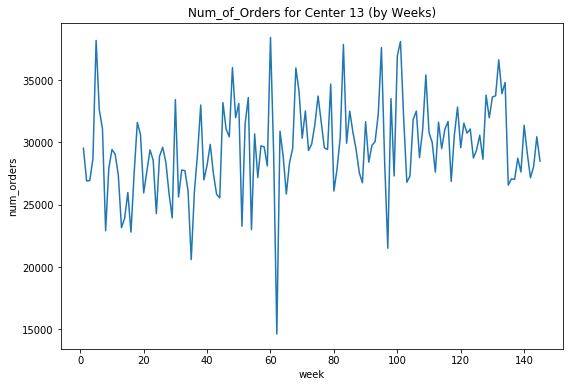

In [40]:
# Step 6c: Plot num_orders vs week
plt.figure(figsize=(9,6))
sns.lineplot(x = ctr_13_by_week['week'], y=ctr_13_by_week['num_orders']).set(title='Num_of_Orders for Center 13 (by Weeks)')
plt.show()

<details>
    <summary>Click once to see if you got the same plot as us!</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/Center13GroupbyWeekPlot.png"></div>
</details>

### Optional: Plot center_id 13, 43, and 10 on same plot
If you look at the numbers, it seems that center_id 13, 43, and 10 have simlar numbers.

Repeat Step 6 for center_id 43 and 10, and plot all of them together.

The reward for your curiousity is something interesting.

In [70]:
# Plot center_id 13, 43, and 10 on the same plot.
top_ctrs_by_week = df1[df1['center_id'].isin([13, 43, 10])].groupby(['week','center_id'],as_index=False)['num_orders'].sum()
top_ctrs_by_week['center_id'] = top_ctrs_by_week['center_id'].astype(str)

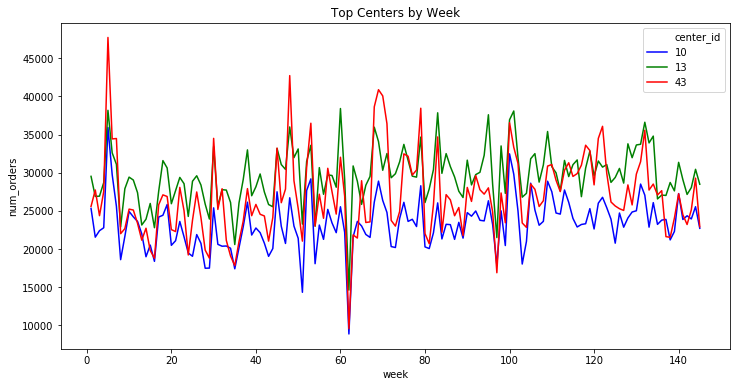

In [88]:
plt.figure(figsize=(12,6))
sns.lineplot(x = top_ctrs_by_week['week']
             , y=top_ctrs_by_week['num_orders']
             , hue=top_ctrs_by_week['center_id']
             , palette=['b','g','r']).set_title('Top Centers by Week')#have to specify palette to the EXACT no. of items in hue, else lineplot treats hue as numeric and gives wrong viz
plt.show()

# Observations from above query
- Peaks arise approx every 20 weeks except for period of wk 60 to 80
- In wks 60-80, there was a sharp dip, but also 3 spikes instead of the usual 1 spike
- ctr_id 43 num_orders is more volatile than the others, with bigger spikes & troughs

<details>
    <summary>Click once to see if you got the same plot as us! What is the interesting thing? Additionally, what do you think the reason is?</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/Center13_43_10GroupbyWeekPlot.png"></div>
</details>

### Step 7: Isolate and examine center_id 91
<blockquote>Tell me more about center_id 91, and tell me why it isn't performing?</blockquote>
From our work in Step 5, it seems that center_id 91 was the worst performing center in terms of total revenue. 

Is it a fair assessment to say that center_id 91 isn't performing?

To find out, let's filter the DataFrame for center_id 91 only, similar to Step 6a.

In [74]:
# Step 7a: Get center_id 91 information only and display the DataFrame
df1[df1['center_id'] == 91]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_revenue
3155,1330302,1,91,1885,136.83,134.83,0,0,54,590,56,TYPE_C,0.9,Beverages,Thai,7388.82
3156,1460326,2,91,1885,136.83,135.83,0,0,109,590,56,TYPE_C,0.9,Beverages,Thai,14914.47
3157,1016873,3,91,1885,139.74,138.74,0,0,53,590,56,TYPE_C,0.9,Beverages,Thai,7406.22
3158,1113380,4,91,1885,134.89,134.89,0,0,94,590,56,TYPE_C,0.9,Beverages,Thai,12679.66
3159,1159396,5,91,1885,146.50,146.50,0,0,41,590,56,TYPE_C,0.9,Beverages,Thai,6006.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442688,1374855,119,91,1438,196.00,243.50,0,0,14,590,56,TYPE_C,0.9,Soup,Thai,2744.00
447048,1204992,100,91,2494,194.00,194.00,0,0,13,590,56,TYPE_C,0.9,Soup,Thai,2522.00
447049,1137148,103,91,2494,194.00,195.00,0,0,15,590,56,TYPE_C,0.9,Soup,Thai,2910.00
447050,1136995,106,91,2494,244.50,244.50,0,0,15,590,56,TYPE_C,0.9,Soup,Thai,3667.50


In [ ]:
# Step 7b: Display the DataFrame from 6a

# Observations from above query
- There are only 3432 rows for ctr_id 91 vs 7046 rows for ctr_id 13. This could mean ctr_id 91 is a new facility that has just started, hence resulting in less orders
- op_area is much smaller than ctr_id 13 which could affect no. of orders created

<details>
    <summary>Is there anything you observe that could be attributed to the difference in performance?</summary>
    <div><strong>Check out op_area - these two centers are in the same region and city but the op_area of center_id 91 is way smaller than 13. This may lead to lower capacity to fulfil orders.</strong></div>
</details>

### Step 8: Groupby center_id and get total_revenue, op_area, and num_orders
Based on what we saw in Step 7, let's investigate this further.

Perform a groupby operation to get a DataFrame containing total_revenue, op_area, num_orders by center_id.

There are a few ways to do this:
1. groupby using center_id, and with aggregate (the reading at the top of this notebook is useful)
2. groupby using center_id, and merging the op_area from the main DataFrame with the groupby DataFrame

Regardless of which method you use, you'll end up with something like this:

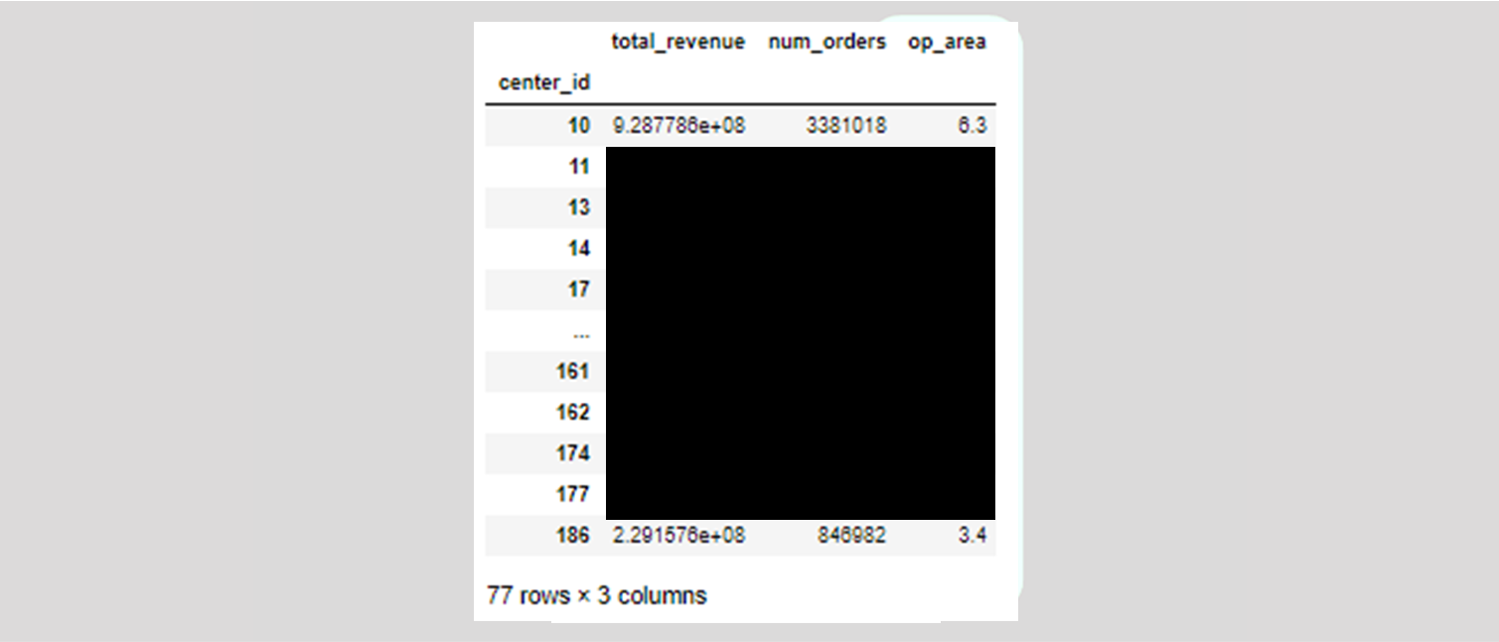

In [86]:
# Step 8: Get the groupby DataFrame containing op_area
group_df1 = df1.groupby('center_id', as_index=False).agg(
{
'total_revenue':'sum'
,'num_orders':'sum'
,'op_area':'mean'
}
).sort_values(by='total_revenue',ascending=False)

### Step 9: Plot total_revenue vs op_area
The moment of truth - let's plot these two from the DataFrame you got from Step 8.

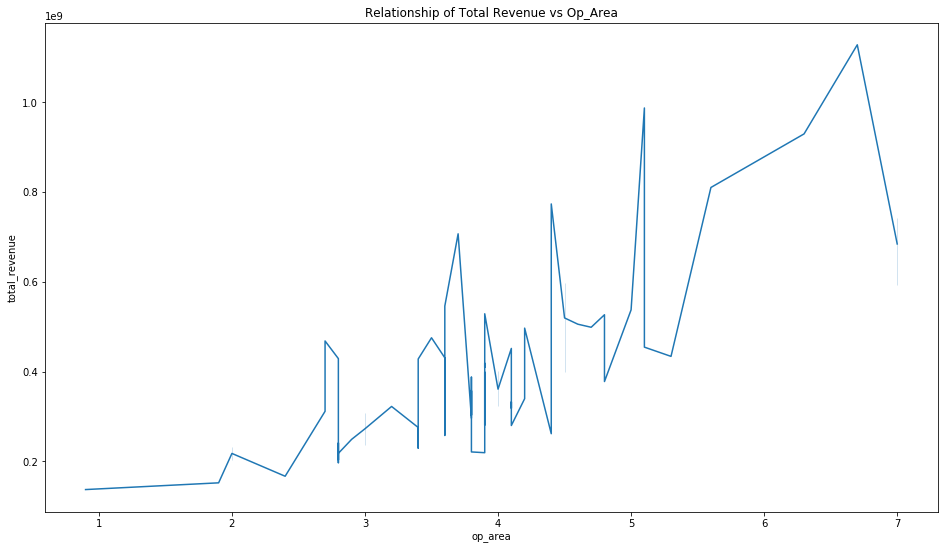

In [90]:
# Step 9: Plot total_revenue vs op_area
plt.figure(figsize = (16,9))
sns.lineplot(x = group_df1['op_area']
             ,y = group_df1['total_revenue']
             ).set_title('Relationship of Total Revenue vs Op_Area')
plt.show()

<details>
    <summary>Click once to see if you got the same plot.</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/TotalRevenueVSOpArea.png"></div>
    <div><strong>Looks like there is some sort of correlation after all, between the fulfilment center's area and the eventual total revenue.</strong></div>
</details>

### Step 10: Plot num_orders vs op_area
Let's plot num_orders vs op_area as well.

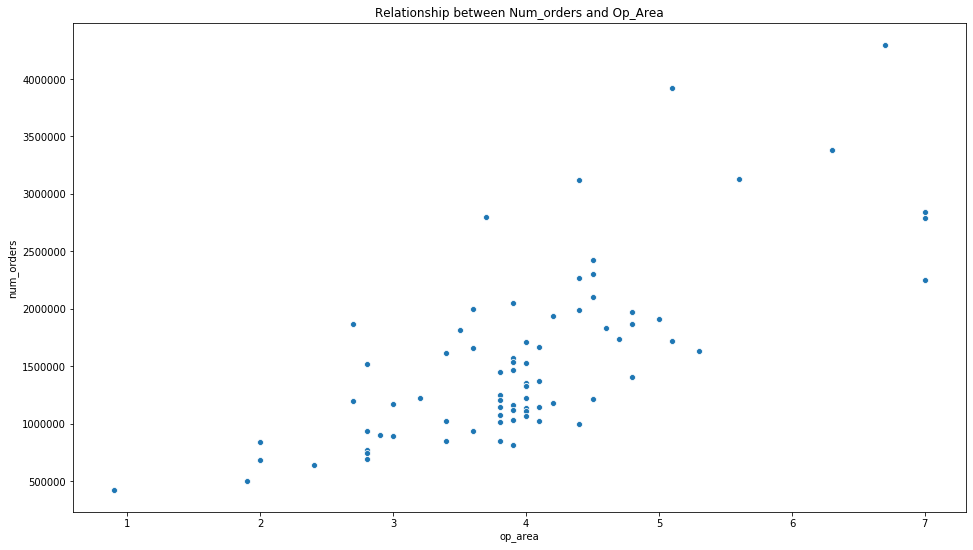

In [91]:
# Step 10: Plot num_orders vs op_area
plt.figure(figsize=(16,9))
sns.scatterplot(x = group_df1['op_area']
               ,y = group_df1['num_orders']).set_title('Relationship between Num_orders and Op_Area')
plt.show()

<details>
    <summary>Click once to see if you got the same plot.</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/NumOrdersVSOpAreaV2.png"></div>
    <div><strong>Looks like there is some sort of correlation after all, between the fulfilment center's area and the eventual total revenue.</strong></div>
</details>

### Step 11: Create a new column named 'discounts'
<blockquote>Does having discounts help in selling more?</blockquote>
In the dataset, we see that there are two prices - base_price and checkout_price. 

There seems to be a difference between the two. We know that from Part II that having email promotions and homepage features help in increasing the number of orders, but does having a difference between these two prices help in selling more?

Let's create a new column called "discounts", where it is base_price - checkout_price.

In [92]:
# Step 11: Create a 'discounts' column
df1['discounts'] = df1['base_price'] - df1['checkout_price']
df1.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_revenue,discounts
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91,15.46
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,43873.09,16.46
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,12760.32,1.00
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,22145.18,-1.00
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,31497.50,1.00


### Step 12: Plot num_orders vs discounts with a scatterplot
Now that we have the discounts column, let's plot a scatterplot to see if there's any relationship between the two. 

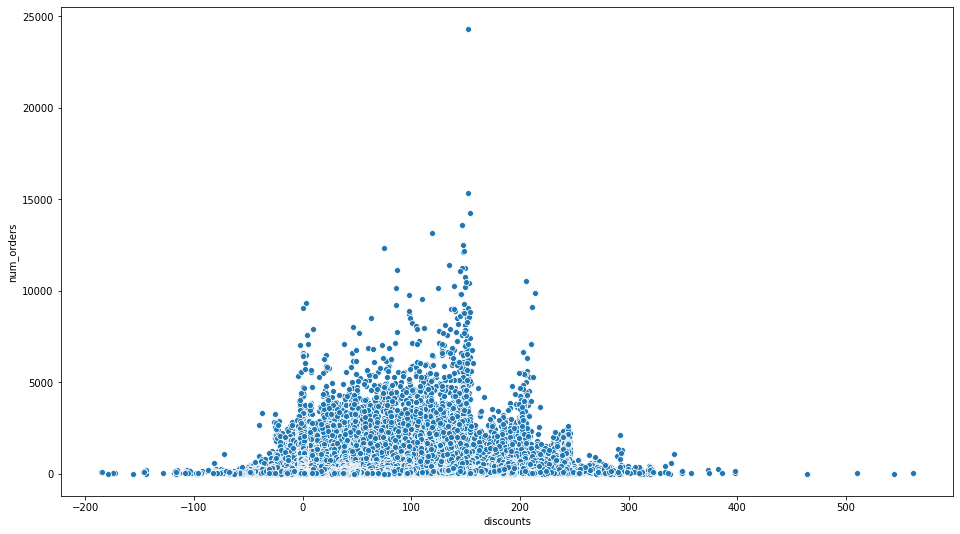

In [97]:
# Step 12: Plot num_orders vs discounts
plt.figure(figsize=(16,9))
sns.scatterplot(x = df1['discounts']
               ,y = df1['num_orders'])
plt.show()

<details>
    <summary>What'd you think? Is there a relationship?</summary>
    <div><strong>No, not really. It does not seem like discounts have a strong correlation with number of orders.</strong></div>
</details>

### Step 13: Create a new column called has_promotion
<blockquote>How differently do we do if we have features and promotions?</blockquote>
From our previous part, we saw that there was a difference in the number of orders when promotions and features were involved.

Let's take this one step further, and quantify this difference. 

We'll examine what is the % increase in orders that happens when there are promotions and features.

Firstly, let's create a new column called has_promotion.

The column contains 1 if emailer_for_promotion OR homepage_featured has a 1, and 0 if there is neither. We lump them together because there are orders for food that were involved in both promotions and features, so it is challenging to separate their effects anyways.

There are a few ways to do it:
1. [Easy] Use an OR operator
2. [Easy] Use .iterrows and if/else 
3. [Hard] List comprehension

Regardless, you'll be looking out for a DataFrame that looks like this:

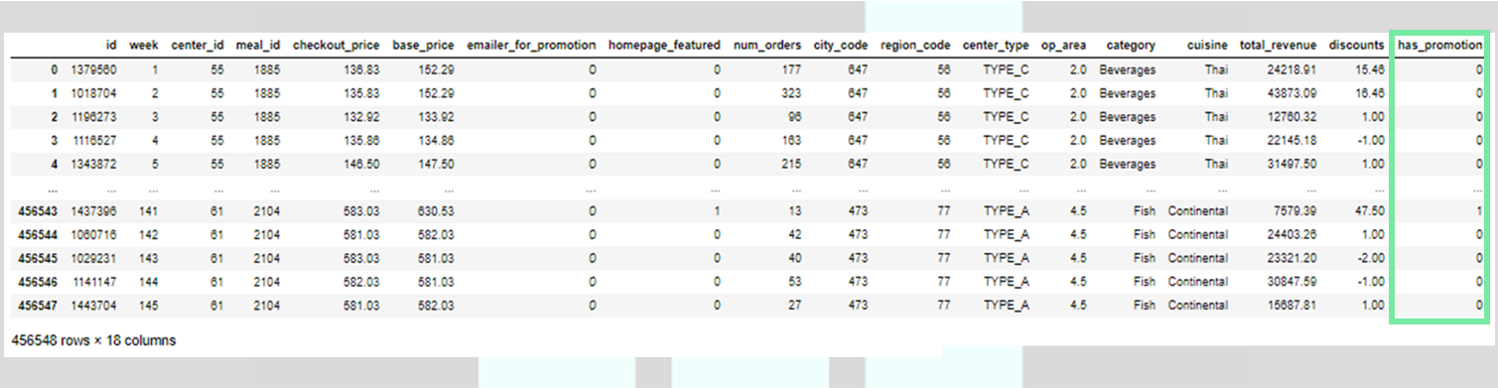

In [114]:
# Step 13: Create has_promotions
# Use List comprehension method because it is most efficient (https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)
df1['has_promotions']  = [0 if (email, promo) == (0,0) else 1 for (email,promo) in zip(df1['emailer_for_promotion'], df1['homepage_featured'])]

In [117]:
#Check list compre
df1[df1['homepage_featured'] == 0].sample(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_revenue,discounts,has_promotions
421644,1107765,45,67,1878,281.33,280.33,0,0,365,638,56,TYPE_B,7.0,Starters,Thai,102685.45,-1.00,0
78679,1124322,121,17,1062,192.06,192.06,0,0,378,517,56,TYPE_A,3.2,Beverages,Italian,72598.68,0.00,0
234492,1210313,41,23,1311,138.77,162.05,0,0,96,698,23,TYPE_A,3.4,Extras,Thai,13321.92,23.28,0
432782,1339463,132,36,2577,321.13,321.13,0,0,162,517,56,TYPE_B,4.4,Starters,Thai,52023.06,0.00,0
353711,1410411,116,50,1216,413.25,412.25,0,0,27,556,77,TYPE_A,4.8,Pasta,Italian,11157.75,-1.00,0


### Step 14: Get the average of total_revenue from different has_promotion values
Let's see how the average total_revenue values are when there is and isn't any promotion involved.

Get the mean of total_revenue when:
1. has_promotion == 0
2. has_promotion == 1

In [125]:
# Step 14a: Filter the DataFrame for has_promotion == 0 and get the mean of total_revenue
df1[df1['has_promotions'] == 0]['total_revenue'].mean()

58089.86037820437

In [126]:
# Step 14b: Filter the DataFrame for has_promotion == 1 and get the mean of total_revenue
df1[df1['has_promotions'] == 1]['total_revenue'].mean()

137913.1523982626

### Step 15: Export DataFrame as CSV
We're done! But before we end this, let's export the DataFrame we were working with as CSV for the next section.

Check that your current DataFrame has:
1. 456,548 rows
2. 18 columns 

You have three new columns - total_revenue, discounts, and has_promotions.

In [128]:
# Check dataframe columns and rows
df1.shape

(456548, 18)

In [130]:
# Step 15: Export DataFrame as CSV
df1.to_csv('engineered_data.csv',index=False)

# End of Part III
We've come to the end of Part III. In this Part, you've manipulated the DataFrame further so that you can answer business-related questions.

By asking the right questions, we uncover more relationships between the features in the dataset. 

For example, in Part II we examined the relationship between op_area and num_orders but didn't quite see anything.

However, when we aggregated the num_orders by center_id, we see that there is a linear relationship between the op_area and the num_orders.

In Part IV, we will engineer additional features for our model training.